#Data Preparation

**Bank Churns - Digimon Team**
- Tujuan Project ini adalah untuk memprediksi siapa yang akan di-churn (persentase pelanggan yang berhenti menggunakan produk dan layanan kartu kredit selama jangka waktu tertentu) sehingga dapat secara proaktif mendatangi pelanggan untuk memberikan layanan yang lebih baik dan mengubah keputusan pelanggan untuk tetap stay.


Daftar isi
- Data preparation
  - Import data
  - Brief description of data

- Exploratory Data Analysis
  - Brief Vizualization of data
  - Heatmap
  - Find Outlier of the data

- Data Pre-processing
  - Handling missing data
  - Label Encoding 
  - Handling imbalance dependent variable (target variable)

- Modelling
  - Create various model (KNN, xx, xxx)
  - Model evaluation

- Result

## Import and Data

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
from statsmodels.stats.weightstats import ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/BankChurners.csv')
data.head()

# Drop dua kolom terakhir yang tidak ada kaitannya dengan data lain
data_clean = data.drop(data.columns[[0,21,22]],axis=1)
data_clean.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


##Brief description of data

In [ ]:
#mendeskripsikan data yang ada pada dataset 
print(data_clean.info())
#mencari nilai statistik penyebaran nya
print(data_clean.describe())
print(data_clean.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

#Exploratory Data Analysis

##Visualize the data

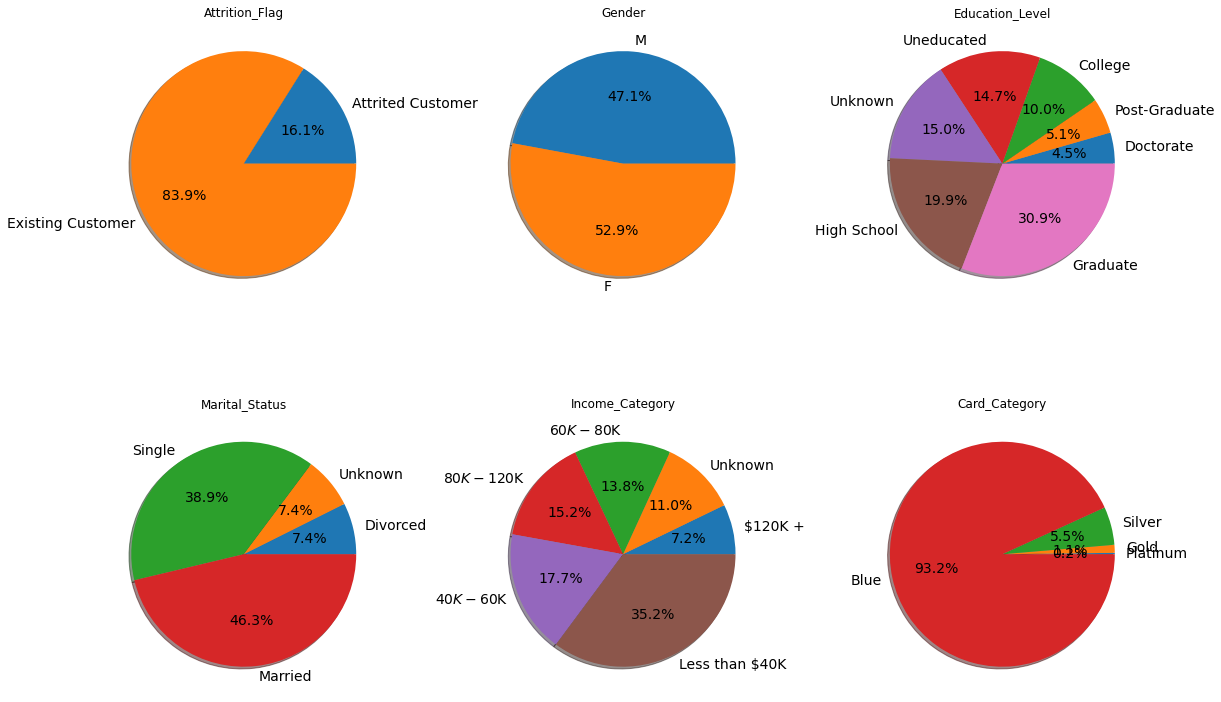

In [ ]:
cat_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

fig, axes = plt.subplots(2,3, figsize=(17,11))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(cat_cols):
  _= data_clean[col].value_counts()[::-1].plot(kind='pie', ax=axes[i], title=col, autopct='%1.1f%%', shadow=True, fontsize=14)
  _= axes[i].set_ylabel('')

_= plt.tight_layout()

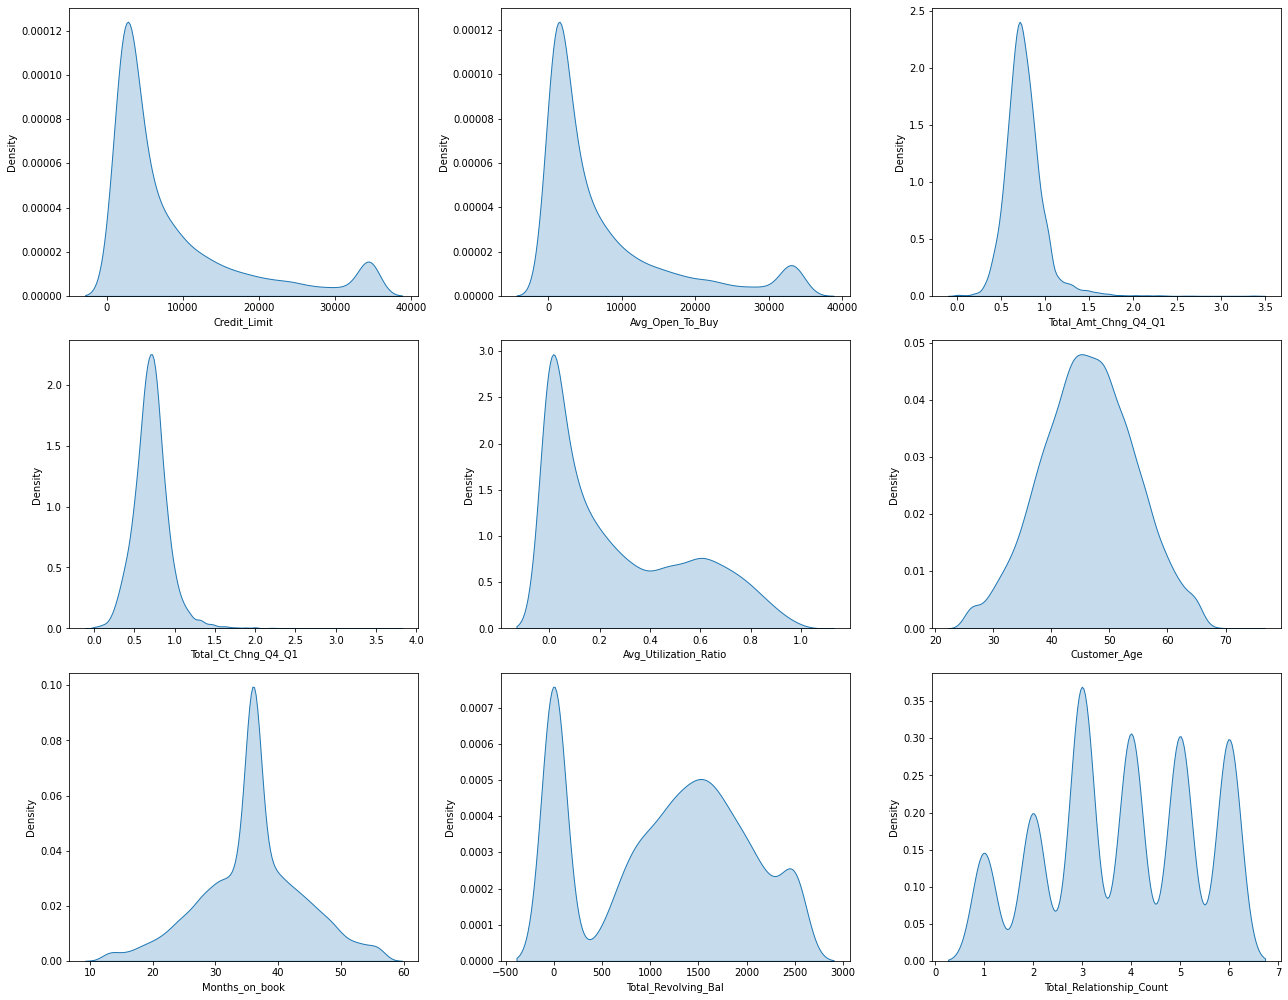

In [ ]:
num_cols = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Customer_Age', 'Months_on_book', 'Total_Revolving_Bal', 'Total_Relationship_Count']
fig, axes = plt.subplots(3,3, figsize=(18,14))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(num_cols):
  plot = sns.kdeplot(data=data_clean, x=col, ax=axes[i], fill=True)

plt.tight_layout()

##Heatmap

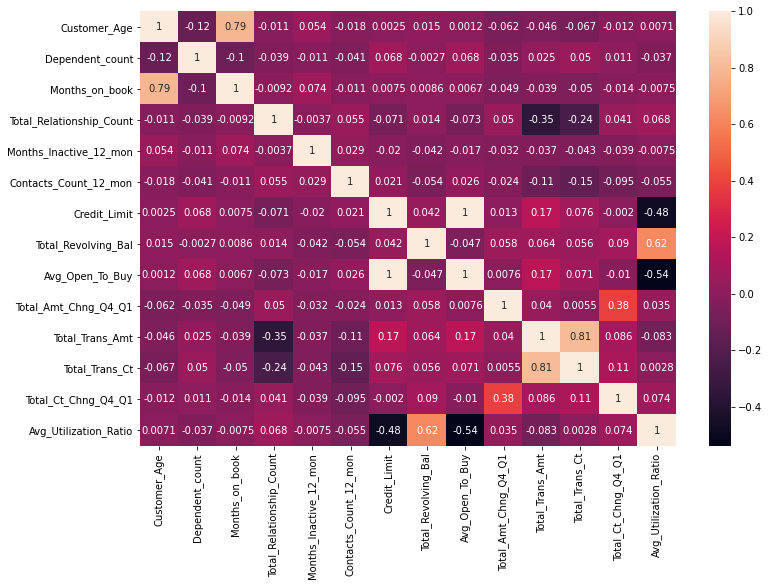

In [ ]:
#Visualisasi cek korelasi menggunakan heatmap
corr = data_clean.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(corr, annot=True);

plt.show()

##Outliers

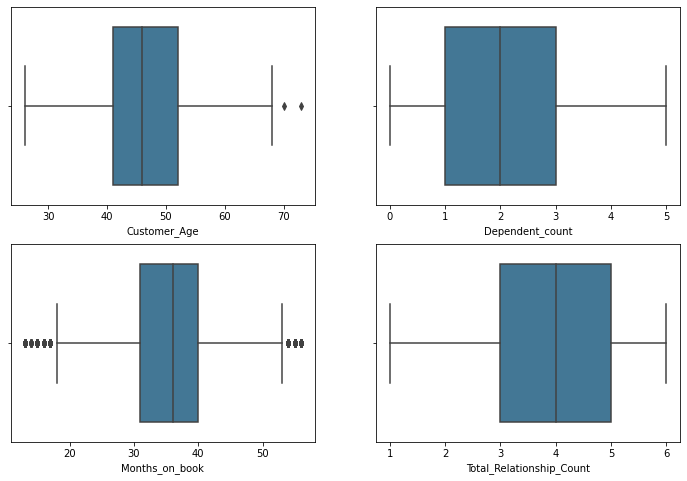

In [ ]:
#Visualisasi untuk cek outliers menggunakan boxplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(ax=axes[0, 0], data=data_clean ,x='Customer_Age',palette='mako')
sns.boxplot(ax=axes[0, 1], data=data_clean, x='Dependent_count',palette='mako')
sns.boxplot(ax=axes[1, 0], data=data_clean, x='Months_on_book',palette='mako')
sns.boxplot(ax=axes[1, 1], data=data_clean, x='Total_Relationship_Count',palette='mako')

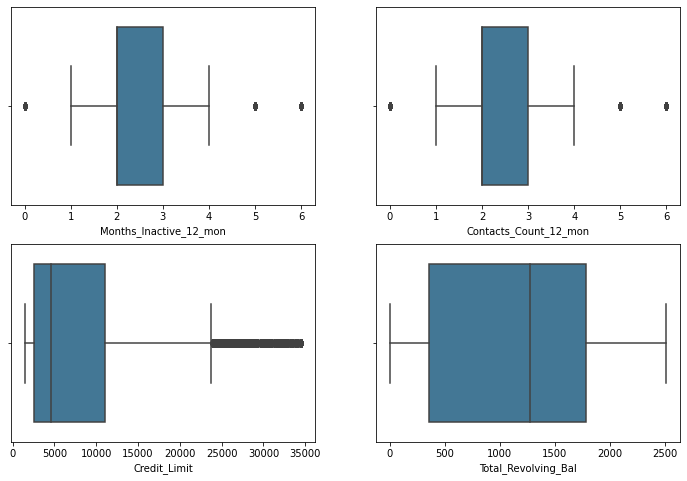

In [ ]:
#Visualisasi untuk cek outliers menggunakan boxplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(ax=axes[0, 0], data=data_clean ,x='Months_Inactive_12_mon',palette='mako')
sns.boxplot(ax=axes[0, 1], data=data_clean, x='Contacts_Count_12_mon',palette='mako')
sns.boxplot(ax=axes[1, 0], data=data_clean, x='Credit_Limit',palette='mako')
sns.boxplot(ax=axes[1, 1], data=data_clean, x='Total_Revolving_Bal',palette='mako')

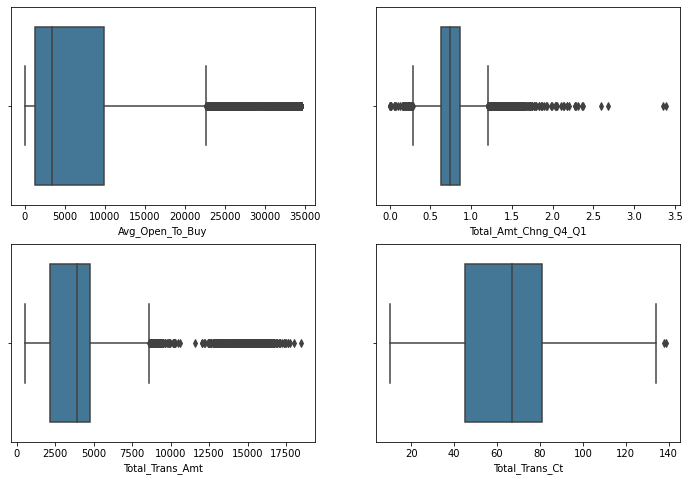

In [ ]:
#Visualisasi untuk cek outliers menggunakan boxplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.boxplot(ax=axes[0, 0], data=data_clean ,x='Avg_Open_To_Buy',palette='mako')
sns.boxplot(ax=axes[0, 1], data=data_clean, x='Total_Amt_Chng_Q4_Q1',palette='mako')
sns.boxplot(ax=axes[1, 0], data=data_clean, x='Total_Trans_Amt',palette='mako')
sns.boxplot(ax=axes[1, 1], data=data_clean, x='Total_Trans_Ct',palette='mako')

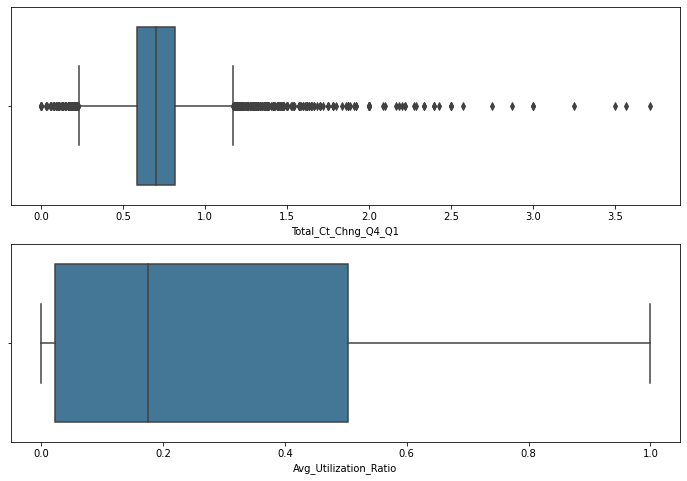

In [ ]:
#Visualisasi untuk cek outliers menggunakan boxplot
fig, axes = plt.subplots(2, figsize=(12, 8))

sns.boxplot(ax=axes[0], data=data_clean ,x='Total_Ct_Chng_Q4_Q1',palette='mako')
sns.boxplot(ax=axes[1], data=data_clean, x='Avg_Utilization_Ratio',palette='mako')


#Data Preprocessing

## Missing Data

In [ ]:
data_clean.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

dapat dilihat bahwa data tersebut tidak terdapat missing value dan nilai yang null. Berarti tidak perlu ada tindakan untuk imputasi dll. 

Selanjutnya kita akan melihat secara visualisasinya dan menetukan target variable yang relevan dengan tujuan project kami.


##Label Encoding

In [ ]:
# Mengubah nilai Categorical menjadi numerik
# Categorical Encoding
from sklearn.preprocessing import LabelEncoder

data = data_clean

data_new = ['Attrition_Flag','Gender','Marital_Status','Education_Level','Income_Category','Card_Category']
le = LabelEncoder()
for i in data_new:
  data[i] = le.fit_transform(data[i])

data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
#Menentukan dataset independent berdasarkan korelasi (data setelah missing values handling dan outlier handling)
data.corr().abs()['Attrition_Flag'].sort_values(ascending = False)

Attrition_Flag              1.000000
Total_Trans_Ct              0.371403
Total_Ct_Chng_Q4_Q1         0.290054
Total_Revolving_Bal         0.263053
Contacts_Count_12_mon       0.204491
Avg_Utilization_Ratio       0.178410
Total_Trans_Amt             0.168598
Months_Inactive_12_mon      0.152449
Total_Relationship_Count    0.150005
Total_Amt_Chng_Q4_Q1        0.131063
Gender                      0.037272
Credit_Limit                0.023873
Dependent_count             0.018991
Marital_Status              0.018597
Customer_Age                0.018203
Income_Category             0.017584
Months_on_book              0.013687
Card_Category               0.006038
Education_Level             0.005551
Avg_Open_To_Buy             0.000285
Name: Attrition_Flag, dtype: float64

## Outlier Handling

##Target Variable

*   Kami memutuskan untuk fokus pada target variable kami yaitu Attrition_Flag dimana berisi dua kategori, Existing_Customer dan Attrited_Customer
*   Karena tujuan kami untuk memprediksi Churning Customer, kami lebih memfokuskan lagi kepada kategori Attrited_Customer 





In [ ]:
# Memisahkan dataset menjadi predictor dan target
data_x = data.drop(['Attrition_Flag'],axis=1)
data_y = data['Attrition_Flag']

x = data_x.astype(float).values
y = data_y.astype(float).values

print("x:", x.shape)
print("y:", y.shape)

x: (10127, 19)
y: (10127,)


In [ ]:
# Nilai 1 = Existing Customer 
# Nilai 0 = Attrited Customer
data['Attrition_Flag'].value_counts()

1    8500
0    1627
Name: Attrition_Flag, dtype: int64

Text(0, 0.5, 'Count')

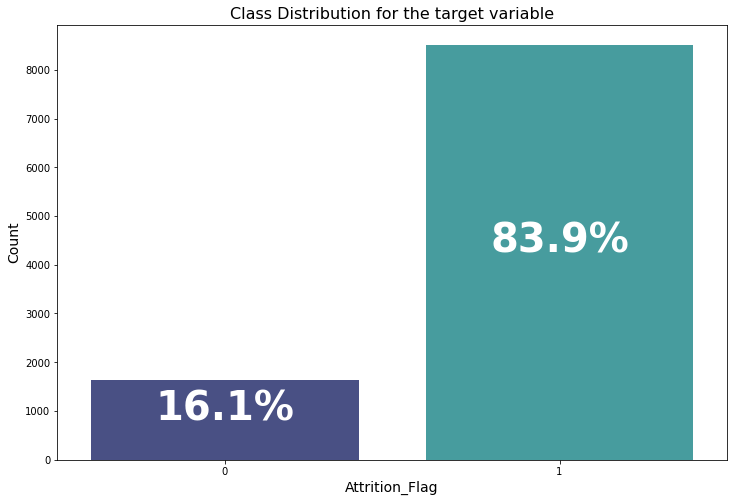

In [ ]:
fig = plt.figure(figsize = (12, 8))
axis = sns.countplot(x = 'Attrition_Flag', data = data_clean ,palette='mako');
axis.set_title('Class Distribution for the target variable', size = 16);

for patch in axis.patches:
    axis.text(x = patch.get_x() + patch.get_width()/2, y = patch.get_height()/2, 
            s = f"{np.round(patch.get_height()/len(data_clean)*100, 1)}%", 
            ha = 'center', size = 40, rotation = 0,weight = 'bold' ,color = 'white')
    
axis.set_xlabel('Attrition_Flag', size = 14)
axis.set_ylabel('Count', size = 14)

Jika kita lihat distribusi antara Existing dengan Attrited Customer sangat tidak seimbang atau Imbalance. Maka tahap selanjutnya kita akan handle dengan Fungsi Random Under Sampling atau Random Over Sampling. Dalam kasus ini, dikarenakan jumlah sample target attrited yang cukup sedikit, kita memilih  oversampling, dengan menggunakan teknik SMOTE

##Imbalance Class Handling

In [ ]:
data_x = data.drop(['Attrition_Flag'],axis=1)
data_y = data['Attrition_Flag']

x = data_x.astype(float).values
y = data_y.astype(float).values

print("x:", x.shape)
print("y:", y.shape)

x: (10127, 19)
y: (10127,)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
x_re, y_re = smote.fit_sample(x,y)
print(pd.DataFrame(y).value_counts())
print(pd.DataFrame(y_re).value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


1.0    8500
0.0    1627
dtype: int64
1.0    8500
0.0    8500
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_re, y_re, test_size = 0.25, random_state = 0)

##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
MinMax = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[ 1.57765777,  1.15852618, -0.31258443, ...,  0.41657861,
        -0.32819411, -0.54878221],
       [-0.24354593,  1.15852618, -0.31258443, ..., -0.27416676,
        -0.08185245, -0.42890232],
       [ 0.07880906, -0.95591886,  0.52208615, ...,  1.18168433,
         0.50970561,  2.1931089 ],
       ...,
       [ 0.62384495,  1.15852618,  0.52208615, ...,  2.80190819,
         0.55267483, -0.66106573],
       [ 0.28489371,  1.15852618,  1.87063318, ..., -0.56426752,
        -1.17847872, -0.75365342],
       [ 0.8963629 , -0.95591886, -1.14725501, ..., -0.88860172,
         0.14876419,  2.12791201]])

#Modeling

### Mencari model yang paling sesuai

Dikarenakan target dari machine learning adalah memprediksi status attrited dari customer yang terdiri dari jawaban yes/no, kita memilih model klasifikasi

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#random forest
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
acc_random_forest = accuracy_score(y_test, y_pred)
pre_random_forest = precision_score(y_test, y_pred, average='macro')
sen_random_forest = recall_score(y_test, y_pred, average='macro')
sens, spec_rf, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')

#logreg
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_log = accuracy_score(y_test, y_pred)
pre_log = precision_score(y_test, y_pred, average='macro')
sen_log = recall_score(y_test, y_pred, average='macro')
sens, spec_log, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')

#knn
knn = KNeighborsClassifier() 
knn.fit(x_train, y_train)  
y_pred = knn.predict(x_test)  
acc_knn = accuracy_score(y_test, y_pred)
pre_knn = precision_score(y_test, y_pred, average='macro')
sen_knn = recall_score(y_test, y_pred, average='macro')
sens, spec_knn, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')

#dt
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
y_pred = decision_tree.predict(x_test)  
acc_dt = accuracy_score(y_test, y_pred)
pre_dt = precision_score(y_test, y_pred, average='macro')
sen_dt = recall_score(y_test, y_pred, average='macro')
sens, spec_dt, sup = sensitivity_specificity_support(y_test,y_pred, average='macro')

In [ ]:
results = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Accuracy': [acc_knn, acc_log, acc_random_forest, acc_dt],
    'Precision': [pre_knn, pre_log, pre_random_forest, pre_dt],
    'Sensitivity/Recall': [sen_knn, sen_log, sen_random_forest, sen_dt],
    'Specificity': [spec_knn, spec_log, spec_rf, spec_dt]})
result_df = results.sort_values(by='Accuracy', ascending=False)
result_df.head(9)

,Model,Accuracy,Precision,Sensitivity/Recall,Specificity
2,Random Forest,0.982824,0.982856,0.982822,0.982822
3,Decision Tree,0.952706,0.952733,0.952708,0.952708
0,KNN,0.924941,0.931370,0.924912,0.924912
1,Logistic Regression,0.848000,0.848211,0.847994,0.847994


Berdasarkan hasil perhitungan akurasi (kapabilitas predikisi model), presisi = proporsi identifikasi yang benar, sensitivity (true positive rate) dan specificity (true negative rate), kita dapat melihat bahwa model random forest merupakan model dengan indikator paling baik dalam memprediksi hasil dari model

##Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(random_state=42)
model_rf = rf.fit(x_train, y_train)
y_test_pred = model_rf.predict(x_test)
y_train_pred = model_rf.predict(x_train)

cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(rf, x_train, y_train, cv=cv)
Val_score = scores.mean()
#print("Scores:", scores)
print("Validation Accuracy:", round(Val_score * 100,2),"%")
#print("Standard Deviation:", scores.std()

Validation Accuracy: 97.77 %


In [ ]:
from sklearn.metrics import accuracy_score

Train_Accuracy = accuracy_score(y_train, y_train_pred)
Test_Accuracy = accuracy_score(y_test, y_test_pred)
print('Train Accuracy :', round(Train_Accuracy * 100,2),"%")
print('Test Accuracy :', round(Test_Accuracy * 100,2),"%")

Train Accuracy : 100.0 %
Test Accuracy : 98.19 %


##Confusion Matrix

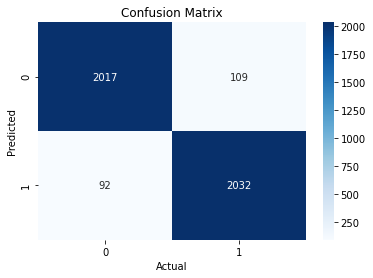

In [ ]:
cm = confusion_matrix(y_test, y_pred)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='', ax=ax, cmap='Blues')
ax.set_xlabel('Actual');ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix')
plt.show()

##Feature Selection - Feature Importance

###Filtering Method - ANOVA

Sebelum feature selection (17000, 19)
Setelah feature selection (17000, 13)
Score of features :
 [9.77211534e+00 4.73879337e+01 1.67753487e+01 7.43822912e-01
 1.46456032e+01 8.41977240e+00 5.91238724e+00 3.92874756e+00
 7.72412845e+02 9.53456989e+02 1.53615821e+03 2.41625708e+01
 2.35322616e+03 2.03042138e-01 6.38813327e+02 1.21830759e+03
 6.66318458e+03 3.34717067e+03 1.19694895e+03]
Score of features :
 [1.77477021e-003 6.02751351e-012 4.22712023e-005 3.88451176e-001
 1.30201463e-004 3.71638667e-003 1.50450451e-002 4.74833614e-002
 2.74796348e-166 9.58117963e-204 9.48606040e-322 8.93616055e-007
 0.00000000e+000 6.52282191e-001 2.15332526e-138 7.45283243e-258
 0.00000000e+000 0.00000000e+000 1.60776942e-253]


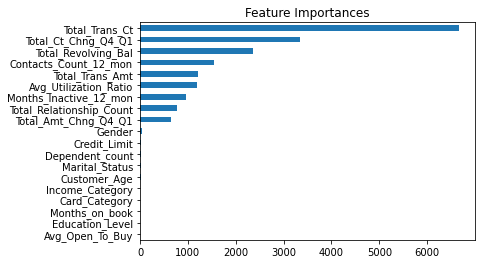

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

#filtering method
filter = SelectKBest(f_classif, k=13)
x_new = filter.fit_transform(x_re,y_re)

print('Sebelum feature selection', x_re.shape)
print('Setelah feature selection', x_new.shape)
print('Score of features :\n', filter.scores_)
print('Score of features :\n', filter.pvalues_)

feat_importances = pd.Series(filter.scores_, index=data_x.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importances')
plt.show()

##Built model after feature selection

In [ ]:
#Train Test Split after Feature selection
x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(x_new, y_re, test_size = 0.25, random_state = 0)

In [ ]:
#random forest
random_forest = RandomForestClassifier()
random_forest.fit(x_train_fs, y_train_fs)
y_pred_fs = random_forest.predict(x_test_fs)
acc_random_forest_fs = accuracy_score(y_test_fs, y_pred_fs)
pre_random_forest_fs = precision_score(y_test_fs, y_pred_fs, average='macro')
sen_random_forest_fs = recall_score(y_test_fs, y_pred_fs, average='macro')
sens, spec_rf_fs, sup = sensitivity_specificity_support(y_test_fs,y_pred_fs, average='macro')

##Evaluation Metrics

In [ ]:
print('Accuracy :',acc_random_forest_fs)
print("Precision:", pre_random_forest_fs)
print("Sensitivity:", sen_random_forest_fs)
print("Specificity:", spec_rf_fs)

Accuracy : 0.9785882352941176
Precision: 0.978637101255531
Sensitivity: 0.9785859052923804
Specificity: 0.9785859052923804


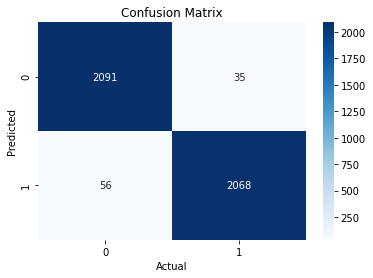

In [ ]:
cm = confusion_matrix(y_test_fs, y_pred_fs)

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='', ax=ax, cmap='Blues')
ax.set_xlabel('Actual');ax.set_ylabel('Predicted')
ax.set_title('Confusion Matrix')
plt.show()